<a href="https://colab.research.google.com/github/vixerica0726/cursodataanalytics/blob/main/probabilidadeAmostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística - Probabilidade e Amostragem




In [8]:
# Bibliotecas para  amanipulação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# "index_col=0" faz com que a primeira coluna do CSV seja usada como índice do DataFrame
df = pd.read_csv("populacao_brasileira.csv.csv", index_col=0)

# Exibe as 10 primeiras linhas do DataFrame
print(df.head(1000))


    estado  idade   escolaridade nível de proficiência em inglês    renda sexo
0       MA     56    Fundamental                   Intermediário  4006.29    F
1       BA     46       Superior                          Básico  2423.11    M
2       AM     32    Fundamental                   Intermediário  3835.69    M
3       CE     60       Superior                          Básico  1870.29    M
4       SE     25    Fundamental                        Avançado  3529.80    M
..     ...    ...            ...                             ...      ...  ...
995     AC     22          Médio                          Básico  2852.40    F
996     PE     40    Fundamental                          Básico  2533.96    M
997     GO     27  Pós-graduação                   Intermediário  1405.30    F
998     RS     61    Fundamental                        Avançado  3513.60    F
999     MG     19       Superior                   Intermediário  2467.30    F

[1000 rows x 6 columns]


In [10]:
df.isnull().sum() # Verificar se há valores nulos


,0
estado,0
idade,0
escolaridade,0
nível de proficiência em inglês,0
renda,0
sexo,0


In [11]:
df.dtypes # Tipos dos dados


,0
estado,object
idade,int64
escolaridade,object
nível de proficiência em inglês,object
renda,float64
sexo,object


In [12]:
df.describe() # Descrição dos dados

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


##1 Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [13]:
# Contar pessoas fluentes (nível avançado)
fluentes = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

# Número total de pessoas
total_pessoas = df.shape[0]

# Probabilidade de ser fluente
p_fluente = fluentes / total_pessoas

# Probabilidade complementar (não fluente)
p_nao_fluente = 1 - p_fluente

# Exibir todos os resultados
print(f"Total de pessoas: {total_pessoas}")
print(f"Total de pessoas fluentes (nível avançado): {fluentes}")
print(f"Probabilidade de ser fluente em inglês: {p_fluente:.4f}")
print(f"Probabilidade de escolher uma pessoa não fluente em inglês: {p_nao_fluente:.4f}")


Total de pessoas: 1000
Total de pessoas fluentes (nível avançado): 344
Probabilidade de ser fluente em inglês: 0.3440
Probabilidade de escolher uma pessoa não fluente em inglês: 0.6560


34% das pessoas são fluentes em inglês (nível avançado).

65% das pessoas não são fluentes em inglês (probabilidade complementar).

Ou seja, a probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês é de 65%.

## 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [14]:
# Filtrar pessoas de Alagoas ou do Pará
estado_alagoas_pará = df[df['estado'].isin(['AL', 'PA'])]

# Filtrar pessoas com renda superior a 5 mil reais
renda_acima_5k = estado_alagoas_pará[estado_alagoas_pará['renda'] > 5000]

# Calcular a probabilidade
probabilidade = renda_acima_5k.shape[0] / estado_alagoas_pará.shape[0]

print(f"A probabilidade de escolher uma pessoa de Alagoas ou do Pará com renda superior a 5 mil reais é: {probabilidade:.4f}")


A probabilidade de escolher uma pessoa de Alagoas ou do Pará com renda superior a 5 mil reais é: 0.0506


Ao escolher aleatoriamente uma pessoa do conjunto de dados, a chance de ela ser de Alagoas ou do Pará e, além disso, ter renda superior a 5 mil reais é de 5,06%.

## 3. Descubra a probabilidade de uma pessoa, residente no estado do Amazonas, ter ensino superior completo (considerando apenas a escolaridade classificada como 'Superior'). Qual a probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo?

In [15]:
# Filtrar pessoas do Amazonas
amazonas = df[df['estado'] == 'AM']

# Filtrar pessoas com ensino superior completo
superior_amazonas = amazonas[amazonas['escolaridade'] == 'Superior']

# Calcular a probabilidade
probabilidade_superior = superior_amazonas.shape[0] / amazonas.shape[0]

print(f"A probabilidade de uma pessoa do Amazonas ter ensino superior completo é: {probabilidade_superior:.4f}")


A probabilidade de uma pessoa do Amazonas ter ensino superior completo é: 0.2368


A probabilidade de a quinta pessoa amazonense que você conversar ter ensino superior completo é a mesma de qualquer outra pessoa, ou seja, 23,68%, porque estamos lidando com probabilidades de eventos independentes. A ordem em que você conversa com as pessoas não altera a chance de uma delas ter ensino superior completo

## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

Contagem de Pessoas por Faixa de Renda:
faixa_renda
(0.0, 1500.0]        55
(1500.0, 3000.0]    414
(3000.0, 4500.0]    442
(4500.0, 6000.0]     89
Name: count, dtype: int64


A faixa de renda mais comum é: (3000.0, 4500.0]




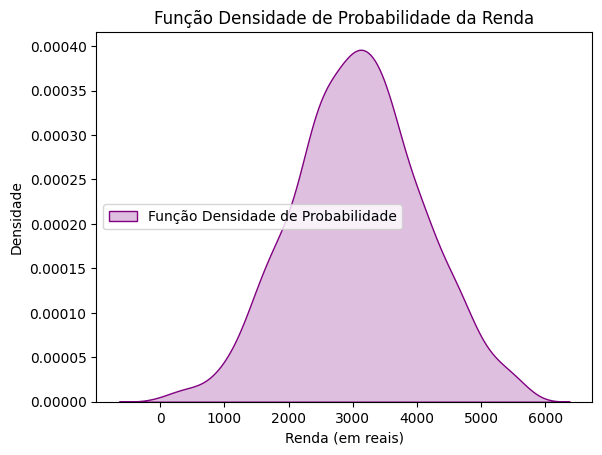

In [16]:
# Definir a faixa de 1.500 reais
faixas = np.arange(0, df['renda'].max() + 1500, 1500)

# Adicionar uma coluna para a faixa de renda
df['faixa_renda'] = pd.cut(df['renda'], bins=faixas)

# Contar quantas pessoas estão em cada faixa de renda
faixa_contagem = df['faixa_renda'].value_counts().sort_index()

# Exibir a faixa de renda com o maior número de pessoas
faixa_comum = faixa_contagem.idxmax()

# Exibir resultados de forma organizada
print("Contagem de Pessoas por Faixa de Renda:")
print(faixa_contagem)
print("\n")

print(f"A faixa de renda mais comum é: {faixa_comum}")
print("\n")

# Plotando a função densidade de probabilidade
sns.set_palette("Purples")
sns.kdeplot(df['renda'], fill=True, color="purple", label="Função Densidade de Probabilidade")
plt.title("Função Densidade de Probabilidade da Renda")
plt.xlabel("Renda (em reais)")
plt.ylabel("Densidade")
plt.legend()
plt.show()


Foi verificado que a maior parte da população está na faixa de renda entre R$ 3.000,00 e R$ 4.500,00. Para entender melhor a distribuição, calculamos a Função Densidade de Probabilidade (FDP), que mostrou que a maior concentração de pessoas está justamente nessa faixa de renda.
Sendo assim, a renda mais comum entre as pessoas é aquela que fica entre 3.000,00 e 4.500,00, e a curva gerada pela FDP confirma essa tendência, indicando uma maior densidade nessa faixa.

## 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico

Média da renda: 3082.54
Variância da renda: 993156.23


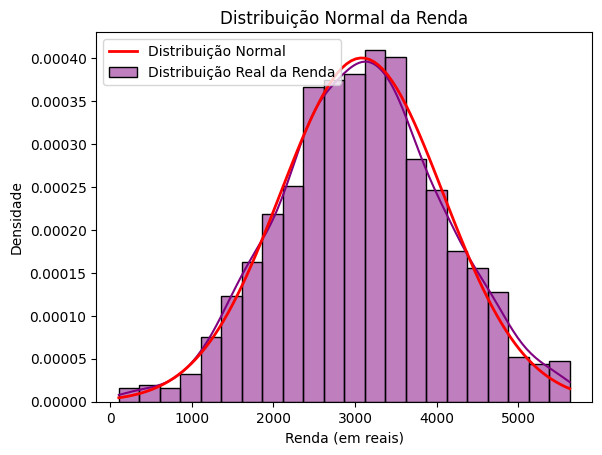

In [17]:
from scipy.stats import norm

# Calcular a média e a variância da coluna 'renda'
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

# Exibir média e variância
print(f"Média da renda: {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")

# Gerar os valores da distribuição normal com a média e variância
# Definindo o intervalo de x para o gráfico
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)

# Criar a distribuição normal com média e desvio padrão
y = norm.pdf(x, media_renda, np.sqrt(variancia_renda))

# Plotando o gráfico da distribuição normal
sns.histplot(df['renda'], kde=True, color="purple", stat="density", label="Distribuição Real da Renda")
plt.plot(x, y, color="red", label="Distribuição Normal", linewidth=2)

# Adicionando título e legendas
plt.title("Distribuição Normal da Renda")
plt.xlabel("Renda (em reais)")
plt.ylabel("Densidade")
plt.legend()

plt.show()

A média da renda é o valor que representa o "centro" ou a renda típica das pessoas na amostra. No caso, a média de 3082,54 reais significa que, em média, as pessoas da amostra ganham cerca de R$ 3.082,54 por mês.

Com uma variância de 993.156,23, isso indica que as rendas estão muito dispersas em torno da média. Em outras palavras, há uma grande variação nas rendas. Ou seja, enquanto algumas pessoas podem ganhar perto de R$ 3.082,54, outras podem ter rendas muito mais altas ou mais baixas.

## 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [18]:
from scipy.stats import binom

# Calcular a probabilidade de pós-graduação na amostra
p_pos_graduacao = (df['escolaridade'] == 'Pós-graduação').mean()

# Número total de pessoas na nova população (1 milhão)
n = 1_000_000

# Número desejado de pessoas com pós-graduação (243 mil)
k = 243000

# Usando uma aproximação normal (para grandes n, a distribuição binomial se aproxima de uma normal)
media = n * p_pos_graduacao
desvio_padrao = np.sqrt(n * p_pos_graduacao * (1 - p_pos_graduacao))

# Calcular a probabilidade usando a normal (aproximação)
probabilidade = binom.cdf(k, n, p_pos_graduacao)

# Exibir o resultado
print(f"A probabilidade de encontrar até 243.000 pessoas com pós-graduação em uma população de 1 milhão é: {probabilidade:.4f}")


A probabilidade de encontrar até 243.000 pessoas com pós-graduação em uma população de 1 milhão é: 0.0000


A probabilidade de 0.0000 ocorre porque 243.000 é um número muito grande comparado ao que seria esperado de pessoas com pós-graduação em uma população de 1 milhão, considerando a amostra atual. A solução seria revisar o valor de k ou verificar a distribuição real dos dados sobre a pós-graduação.

## 7. Somando as densidades nós temos a função de densida de acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

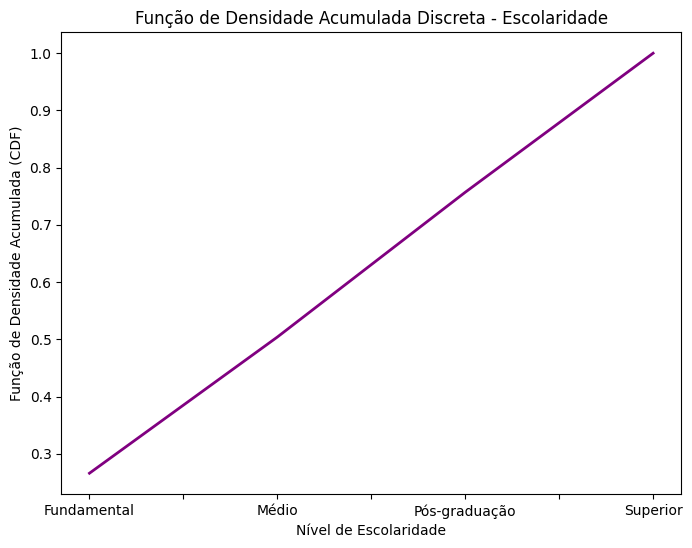

escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: count, dtype: float64


In [19]:
import matplotlib.pyplot as plt

# Contagem das pessoas por nível de escolaridade
contagem_escolaridade = df['escolaridade'].value_counts().sort_index()

# Calcular a probabilidade de cada nível de escolaridade
probabilidade_escolaridade = contagem_escolaridade / len(df)

# Calcular a função de densidade acumulada (CDF)
cdf_escolaridade = probabilidade_escolaridade.cumsum()

# Plotar a função de densidade acumulada
plt.figure(figsize=(8, 6))
cdf_escolaridade.plot(kind='line', color='purple', linewidth=2)  # Usando 'line' em vez de 'step'

# Adicionar título e rótulos
plt.title('Função de Densidade Acumulada Discreta - Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Função de Densidade Acumulada (CDF)')

# Exibir gráfico
plt.show()

# Exibir os valores de CDF para cada nível de escolaridade
print(cdf_escolaridade)


O número vai aumentando conforme subimos na escolaridade. Ou seja, a probabilidade de uma pessoa ter um nível de escolaridade igual ou superior ao que está sendo considerado, cresce à medida que o nível de escolaridade também aumenta.

26,6% das pessoas têm no máximo ensino fundamental, 50,4% têm no máximo ensino médio, 75,7% têm até pós-graduação e 100% têm pelo menos ensino superior.

## 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [20]:
import math

# Calcular a proporção de pessoas com inglês intermediário
p_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0] / total_pessoas

# Tamanho da amostra (número total de pessoas)
n = total_pessoas

# Valor crítico Z para 95% de confiança
Z = 1.96

# Calcular a margem de erro
margem_erro = Z * math.sqrt((p_intermediario * (1 - p_intermediario)) / n)

# Exibir o resultado
print(f"A margem de erro amostral para a proporção de pessoas com inglês intermediário é: {margem_erro:.4f}")


A margem de erro amostral para a proporção de pessoas com inglês intermediário é: 0.0291


A margem de erro de 0.0291 (ou 2.91%) significa que, na nossa amostra, a estimativa da proporção de pessoas com inglês intermediário pode variar até 2.91% para mais ou para menos. Isso quer dizer que, se fizermos outra amostra, a porcentagem real de pessoas com inglês intermediário pode estar entre 2.91% a mais ou a menos do valor que encontramos. Em outras palavras, a margem de erro nos dá uma ideia de quão precisa é a nossa estimativa. Quanto menor a margem, mais confiável é a estimativa.

## 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [21]:
# Calcular a média da renda
media_renda = df['renda'].mean()

# Definir o limite de renda mil reais superior à média
limite_renda = media_renda + 1000

# Filtrar pessoas com renda superior ao limite
pessoas_com_renda_superior = df[df['renda'] > limite_renda]

# Calcular a probabilidade (número de pessoas com renda superior / total de pessoas)
probabilidade = pessoas_com_renda_superior.shape[0] / df.shape[0]

# Exibir os resultados
print(f"Média da renda: {media_renda:.2f}")
print(f"Probabilidade de encontrar uma pessoa com renda superior a {limite_renda:.2f}: {probabilidade:.4f}")


Média da renda: 3082.54
Probabilidade de encontrar uma pessoa com renda superior a 4082.54: 0.1610


A média da renda das pessoas no conjunto de dados é de 3.082,54 reais. Ao considerar uma renda 1.000 reais acima da média (ou seja, 4.082,54 reais), foi calculada a probabilidade de encontrar pessoas com essa renda maior. Essa probabilidade é de 35%, ou seja, 35% das pessoas têm uma renda superior a 4.082,54 reais.

## 10. Qual é a probabilidade de escolhermos uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais?


In [22]:
# Filtrar pessoas da região Sudeste, homens, com ensino fundamental e renda superior a 2 mil reais
pessoas_criterio = df[(df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
                       (df['sexo'] == 'M') &
                       (df['escolaridade'] == 'Fundamental') &
                       (df['renda'] > 2000)]

# Número total de pessoas que atendem ao critério
num_pessoas_criterio = pessoas_criterio.shape[0]

# Número total de pessoas
total_pessoas = df.shape[0]

# Calcular a probabilidade
probabilidade = num_pessoas_criterio / total_pessoas

# Exibir o resultado
print(f"A probabilidade de escolher uma pessoa da região Sudeste, homem, com ensino fundamental e renda superior a 2 mil reais é: {probabilidade:.4f}")



A probabilidade de escolher uma pessoa da região Sudeste, homem, com ensino fundamental e renda superior a 2 mil reais é: 0.0190


A probabilidade de 0.0190 (ou 1.90%) significa que, com base nos dados fornecidos, 1.90% das pessoas atendem ao critério de serem homens da região Sudeste, com ensino fundamental completo e renda superior a 2 mil reais.

Isso quer dizer que, se eu escolhesse uma pessoa aleatoriamente desse conjunto de dados, a chance de ela se encaixar nesse perfil seria de cerca de 1 em 53. É uma forma de entender a distribuição dessa característica no meu conjunto de dados.